Dataset: [Student Sleep Patterns](https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns?select=student_sleep_patterns.csv)

# Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Data Loading and Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv('/content/student_sleep_patterns 4.csv')

In [3]:
data.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [5]:
data.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [6]:
data.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
University_Year,0
Sleep_Duration,0
Study_Hours,0
Screen_Time,0
Caffeine_Intake,0
Physical_Activity,0
Sleep_Quality,0


# Data Visualization

### Histogram for Sleep Duration and Study Hours
Shows how much students typically sleep and study.

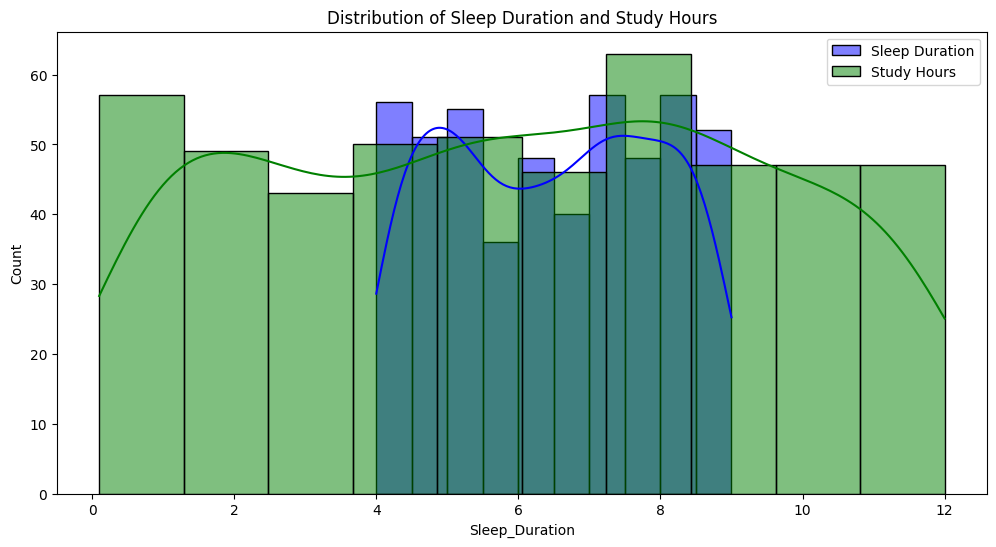

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Sleep_Duration'], kde=True, color='blue', label='Sleep Duration')
sns.histplot(data['Study_Hours'], kde=True, color='green', label='Study Hours')
plt.legend()
plt.title("Distribution of Sleep Duration and Study Hours")
plt.show()

### Box plot of Sleep Quality by University Year
Demonstrates if there is any variation in sleep quality based on academic year.

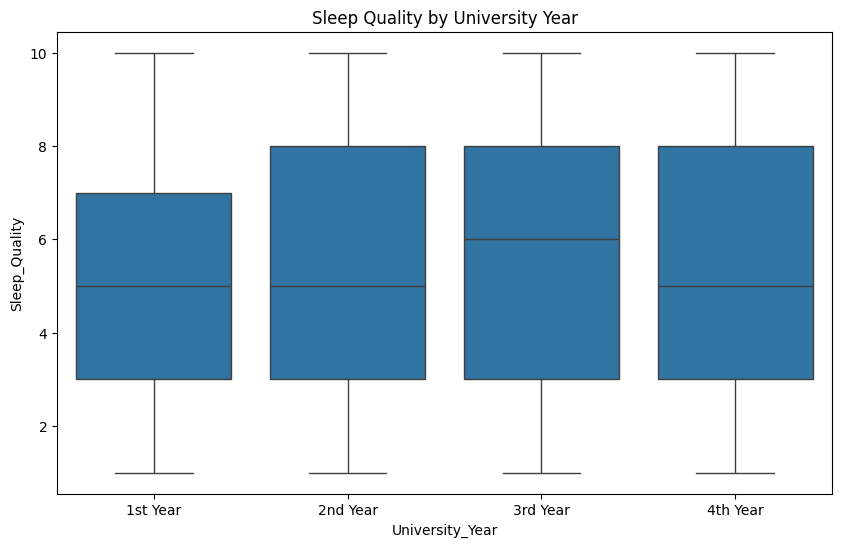

In [8]:
order = ['1st Year', '2nd Year', '3rd Year', '4th Year']

plt.figure(figsize=(10, 6))
sns.boxplot(x='University_Year', y='Sleep_Quality', data=data, order=order)
plt.title("Sleep Quality by University Year")
plt.show()

### Pairplot to visualize correlations between numerical columns
Shows scatterplots for each pair of variables and histograms for individual variables, providing a more visual approach to understanding correlations.

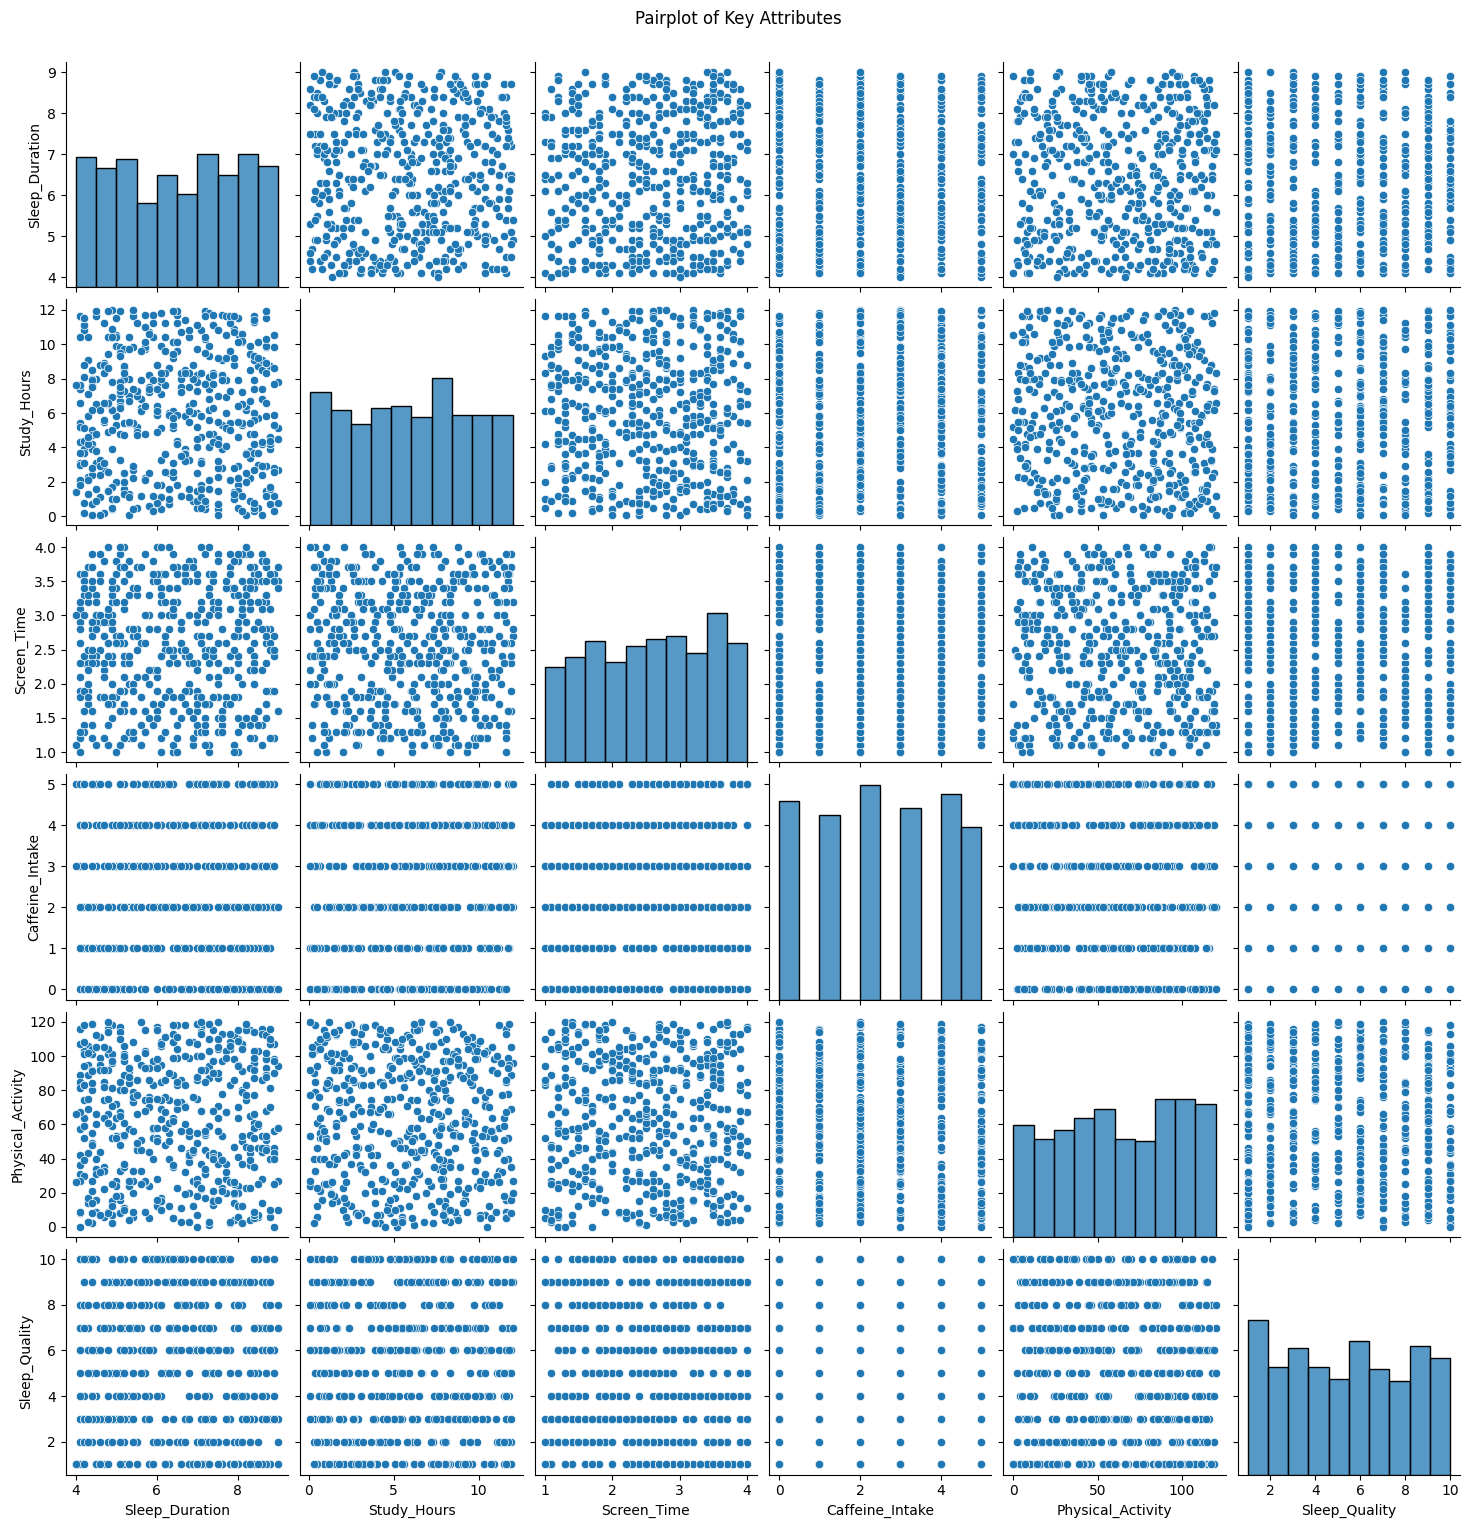

In [9]:
sns.pairplot(data[['Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality']])
plt.suptitle('Pairplot of Key Attributes', y=1.02)
plt.show()

# Data Preprocessing

## Converting time values to 00:00:00 format

In [10]:
time_columns = ['Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End']

In [11]:
def convert_to_time(value):
    if pd.notna(value):
        hours = int(value)
        minutes = int((value - hours) * 60)
        seconds = int(((value - hours) * 60 - minutes) * 60)
        return f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    return None

In [12]:
for col in time_columns:
    data[col] = data[col].apply(convert_to_time)

In [13]:
data

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14:09:36,04:02:59,07:24:36,07:03:35
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,08:43:48,07:05:59,08:12:36,10:12:36
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20:00:00,20:28:11,06:52:47,10:55:11
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19:49:12,04:04:48,06:41:24,09:25:11
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20:58:48,06:07:12,08:58:48,09:00:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17:25:12,08:25:47,06:55:47,10:46:47
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,01:13:11,15:32:23,05:50:59,07:13:48
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,09:56:23,02:15:00,05:27:35,10:43:12
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19:06:00,15:29:24,08:20:59,07:12:00


The resulting dataframe provides each student’s optimal study windows (morning and evening), tailored to their sleep quality and patterns.

# Study recommendations according to circadian preference
An approach that takes into account circadian rhythms (morning larks vs. night owls) by asking students about their preference and adjusting study and sleep recommendations accordingly.

In [14]:
def calculate_optimal_times(row):
    if row['Sleep_Quality'] > 7:
        morning_start = "09:00:00"
        evening_start = "17:00:00"
    elif row['Sleep_Quality'] > 4:
        morning_start = "10:00:00"
        evening_start = "18:00:00"
    else:
        morning_start = "11:00:00"
        evening_start = "19:00:00"

    return {
        'morning_study_time': morning_start,
        'evening_study_time': evening_start
    }

In [15]:
def define_circadian_preference(row):
    if row['Weekday_Sleep_Start'] < "21:00:00":
        return 'Morning'
    else:
        return 'Night'

In [16]:
def study_recommendation(row):
    # Adjust study times based on circadian preference and sleep quality
    if row['Circadian_Preference'] == 'Morning':
        if row['Sleep_Quality'] > 7:
            study_start = "09:00:00"  # earlier for morning people with high sleep quality
            study_type = 'Focused Study'
        elif row['Sleep_Quality'] > 4:
            study_start = "10:00:00"
            study_type = 'Focused Study'
        else:
            study_start = "11:00:00"
            study_type = 'Review'
    else:  # Night person
        if row['Sleep_Quality'] > 7:
            study_start = "21:00:00"  # Later for night people with high sleep quality
            study_type = 'Creative Study'
        elif row['Sleep_Quality'] > 4:
            study_start = "22:00:00"  # Late for night people with average sleep quality
            study_type = 'Creative Study'
        else:
            study_start = "23:00:00"
            study_type = 'Review'

    return {'study_start': study_start, 'study_type': study_type}

In [17]:
# Apply the calculate_optimal_times function to get morning and evening study times
optimal_times = data.apply(calculate_optimal_times, axis=1)
optimal_times_df = pd.DataFrame(optimal_times.tolist())

In [18]:
# Apply the define_circadian_preference function to create Circadian_Preference column
data['Circadian_Preference'] = data.apply(define_circadian_preference, axis=1)

In [19]:
# Apply the study_recommendation function to get study start time and study type
study_recommendations = data.apply(study_recommendation, axis=1)
study_recommendations_df = pd.DataFrame(study_recommendations.tolist())

In [20]:
recommendations = pd.concat([data, optimal_times_df, study_recommendations_df], axis=1)

In [21]:
recommendations[['Student_ID', 'Sleep_Quality', 'morning_study_time', 'evening_study_time', 'Circadian_Preference', 'study_start', 'study_type']]

,Student_ID,Sleep_Quality,morning_study_time,evening_study_time,Circadian_Preference,study_start,study_type
0,1,10,09:00:00,17:00:00,Morning,09:00:00,Focused Study
1,2,2,11:00:00,19:00:00,Morning,11:00:00,Review
2,3,5,10:00:00,18:00:00,Morning,10:00:00,Focused Study
3,4,9,09:00:00,17:00:00,Morning,09:00:00,Focused Study
4,5,3,11:00:00,19:00:00,Morning,11:00:00,Review
...,...,...,...,...,...,...,...
495,496,4,11:00:00,19:00:00,Morning,11:00:00,Review
496,497,4,11:00:00,19:00:00,Morning,11:00:00,Review
497,498,10,09:00:00,17:00:00,Morning,09:00:00,Focused Study
498,499,2,11:00:00,19:00:00,Morning,11:00:00,Review


In [22]:
morning_circadian_df = data[data['Circadian_Preference'] == 'Morning']
morning_circadian_df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Circadian_Preference
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14:09:36,04:02:59,07:24:36,07:03:35,Morning
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,08:43:48,07:05:59,08:12:36,10:12:36,Morning
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20:00:00,20:28:11,06:52:47,10:55:11,Morning
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19:49:12,04:04:48,06:41:24,09:25:11,Morning
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20:58:48,06:07:12,08:58:48,09:00:35,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17:25:12,08:25:47,06:55:47,10:46:47,Morning
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,01:13:11,15:32:23,05:50:59,07:13:48,Morning
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,09:56:23,02:15:00,05:27:35,10:43:12,Morning
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19:06:00,15:29:24,08:20:59,07:12:00,Morning


In [23]:
night_circadian_df = data[data['Circadian_Preference'] == 'Night']
night_circadian_df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Circadian_Preference
12,13,20,Other,3rd Year,4.1,3.1,2.1,3,8,6,21:41:24,10:41:23,05:02:59,08:47:23,Night
90,91,25,Female,2nd Year,7.8,5.4,2.2,2,104,6,21:52:47,16:30:36,05:11:24,09:19:48,Night
99,100,22,Male,2nd Year,6.7,11.4,2.4,3,32,2,21:42:36,17:19:12,06:39:00,09:24:00,Night
102,103,19,Male,4th Year,4.7,5.5,2.7,0,6,3,21:40:12,05:35:23,05:05:23,07:27:35,Night
103,104,21,Other,3rd Year,8.2,6.2,2.7,3,115,9,21:38:24,13:11:23,08:56:59,07:01:11,Night
109,110,24,Male,3rd Year,8.6,8.5,3.5,3,116,3,21:53:24,02:02:59,06:57:35,09:00:00,Night
149,150,25,Female,3rd Year,4.3,9.1,2.3,1,95,2,21:06:35,15:43:48,08:58:48,07:25:11,Night
155,156,19,Other,2nd Year,4.4,0.1,2.4,3,27,10,21:28:48,20:45:36,06:38:23,10:50:59,Night
213,214,24,Female,2nd Year,8.0,1.3,2.7,5,20,5,21:49:12,20:21:35,05:39:36,10:10:11,Night
218,219,25,Other,3rd Year,5.2,9.7,1.2,4,61,9,21:34:12,11:54:36,07:22:47,09:49:48,Night


# Model Evaluation

In [24]:
def precision_at_k(recommendations, k=3):
    top_k_recs = recommendations.head(k)
    relevant_items = top_k_recs[top_k_recs['relevance'] == 1]
    return len(relevant_items) / k

In [25]:
def ndcg_at_k(recommendations, k=3):
    ideal_relevance = np.sort(recommendations['relevance'], axis=None)[::-1]  # Sort relevance in descending order
    relevance_at_k = recommendations.head(k)['relevance']
    dcg = np.sum(relevance_at_k / np.log2(np.arange(2, k + 2)))  # Discounted Cumulative Gain
    idcg = np.sum(ideal_relevance[:k] / np.log2(np.arange(2, k + 2)))  # Ideal DCG
    return dcg / idcg

In [26]:
# Function to determine relevance
def determine_relevance(row):
    # Calculate the expected "ideal" study start time based on sleep quality and circadian preference
    if row['Circadian_Preference'] == 'Morning' and row['Sleep_Quality'] > 5:
        expected_start = "09:00:00"
        expected_type = 'Focused Study'
    elif row['Circadian_Preference'] == 'Night' and row['Sleep_Quality'] > 5:
        expected_start = "21:00:00"
        expected_type = 'Creative Study'
    else:
        expected_start = "10:00:00"
        expected_type = 'Review'

    # Allow ±1 hour for study start
    is_relevant_start = abs((pd.to_datetime(row['study_start']) - pd.to_datetime(expected_start)).seconds) <= 3600
    is_relevant_type = row['study_type'] == expected_type
    return 1 if is_relevant_start and is_relevant_type else 0

In [27]:
recommendations['relevance'] = recommendations.apply(determine_relevance, axis=1)

In [28]:
k = 6
precision_at_k_score = precision_at_k(recommendations, k)
ndcg_at_k_score = ndcg_at_k(recommendations, k)

# Display the results
print(f"Precision at {k}: {precision_at_k_score}")
print(f"NDCG at {k}: {ndcg_at_k_score}")

Precision at 6: 0.8333333333333334
NDCG at 6: 0.8486987932505933


* Precision at 6 = 0.8333: This means that, on average, 83.33% of the top 6 recommendations made by the model are relevant (correct study start times and types based on the user's sleep quality and circadian preferences). This indicates a high level of relevance in the top recommendations, demonstrating that the model effectively aligns its predictions with the expected outputs.
* NDCG at 6 = 0.8487: This means that, when considering both relevance and ranking, the model is providing well-ranked recommendations, with highly relevant items positioned near the top of the list. The score being close to 1 indicates that the ranking quality is very good, ensuring that users receive the most relevant recommendations earlier in the list. However, there is still some room for slight improvement to achieve perfect ranking alignment.

# Deep Learning to Classify Chronotypes
Chronotype classification model using a feedforward neural network

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Prepare the data for training
# Define the features (X) and target (y)
X = data[['Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality']]
y = data['Circadian_Preference'].apply(lambda x: 1 if x == 'Morning' else 0)  # Encode target as binary

In [32]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
# Build the feedforward neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8749 - loss: 0.5635 - val_accuracy: 0.9500 - val_loss: 0.3951
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9379 - loss: 0.3957 - val_accuracy: 0.9500 - val_loss: 0.2901
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9490 - loss: 0.2680 - val_accuracy: 0.9500 - val_loss: 0.2515
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9647 - loss: 0.1788 - val_accuracy: 0.9500 - val_loss: 0.2470
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9552 - loss: 0.1906 - val_accuracy: 0.9500 - val_loss: 0.2531
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.2076 - val_accuracy: 0.9500 - val_loss: 0.2597
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9653 - loss: 0.1455 - val_accuracy: 0.9500 - val_loss: 0.2647
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9672 - loss: 0.1461 - val_accuracy: 0.9500 - val_loss

In [37]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9602 - loss: 0.1868
Test Loss: 0.2405
Test Accuracy: 0.9500


In [38]:
# Predict and add predictions to the original dataset
predictions = (model.predict(X_scaled) > 0.5).astype(int)
data['Predicted_Chronotype'] = predictions

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [39]:
data.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Circadian_Preference,Predicted_Chronotype
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14:09:36,04:02:59,07:24:36,07:03:35,Morning,1
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,08:43:48,07:05:59,08:12:36,10:12:36,Morning,1
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20:00:00,20:28:11,06:52:47,10:55:11,Morning,1
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19:49:12,04:04:48,06:41:24,09:25:11,Morning,1
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20:58:48,06:07:12,08:58:48,09:00:35,Morning,1


# Scope for improvement

* Time of Day Preferences: Fine-tune the feature for determining circadian preferences by incorporating more granular data, like individual chronotype (whether a person is naturally an early bird or night owl) to personalize recommendations more effectively.

* Dynamic Adjustment: Incorporate changes in sleep patterns over time (e.g., seasons, academic periods, personal health) to better adapt the study recommendations for each student.

* Context-Aware Recommendations: Study preferences might vary depending on the specific task (e.g., a project vs. revision). Incorporating this contextual information into the recommendation process could improve precision.

* Bias Reduction: The model might be favoring particular types of recommendations due to imbalanced training data. Balancing data to account for different circadian preferences, study types, and sleep patterns could result in more equitable and effective recommendations.
